In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('/content/drive/MyDrive/Copy of Barbara.png')
image = np.array(image)
print(image.shape)

(128, 128)


In [3]:
class UnionFind:
    def __init__(self):
        self.par = dict()
    def find(self, a):
        if a not in self.par:
            self.par[a] = a
        if a == self.par[a]:
            return a
        self.par[a] = self.find(self.par[a])
        return self.par[a]
    def union(self, u, v):
        u, v = self.find(u), self.find(v)
        self.par[u] = v
        

class Solution:
    def RankTransformuf(self, matrix):
        h, w = len(matrix), len(matrix[0])
        vals = collections.defaultdict(list)
        
        for y in range(h):
            for x in range(w):
                vals[matrix[y][x]] += [(y, x)]
        cur_row = [0 for _ in range(h)]
        cur_col = [0 for _ in range(w)]
        ret = [[0 for _ in range(w)] for _ in range(h)]    
        for val in sorted(vals.keys()):
            uf = UnionFind()
            for y, x in vals[val]:
                uf.union(('y', y), ('x', x))
            groups = collections.defaultdict(list)
            for y, x in vals[val]:
                groups[uf.find(('y', y))].append((y, x))
            for group in groups.values():
                rank = 0
                for y, x in group:
                    rank = max(cur_row[y], cur_col[x], rank)
                for y, x in group:
                    ret[y][x] = cur_row[y] = cur_col[x] = rank + 1
            
        return ret

In [4]:
sol = Solution()

In [5]:
matrix = [[20,-21,14], [-19,4,19], [22,-47,24], [-19,4,19]]
rtm = []

In [6]:
import collections
rtm = sol.RankTransformuf(matrix)

In [7]:
print(rtm)

[[4, 2, 3], [1, 3, 4], [5, 1, 6], [1, 3, 4]]


In [10]:
rtm_img = []
rtm_img = sol.RankTransformuf(image)
print(rtm_img)
print(image)

[[170, 176, 152, 165, 152, 57, 52, 121, 87, 42, 78, 57, 105, 127, 74, 11, 12, 33, 84, 121, 139, 153, 158, 169, 165, 157, 144, 130, 117, 110, 111, 123, 140, 151, 149, 132, 111, 97, 93, 78, 123, 144, 138, 139, 140, 138, 137, 136, 136, 137, 137, 140, 140, 139, 142, 142, 111, 65, 69, 74, 78, 79, 80, 80, 81, 80, 78, 76, 76, 77, 79, 80, 101, 179, 180, 173, 186, 186, 176, 125, 111, 125, 125, 109, 121, 148, 143, 133, 116, 106, 112, 99, 89, 102, 101, 123, 126, 113, 89, 76, 72, 76, 90, 118, 133, 110, 76, 81, 75, 83, 84, 83, 87, 79, 76, 86, 67, 71, 69, 70, 77, 84, 72, 79, 74, 70, 79, 79], [172, 178, 142, 171, 141, 43, 50, 119, 89, 34, 70, 64, 110, 179, 127, 21, 10, 28, 93, 141, 134, 122, 115, 111, 113, 120, 128, 138, 143, 140, 130, 116, 98, 81, 69, 63, 62, 67, 73, 70, 122, 143, 137, 139, 139, 138, 138, 137, 137, 137, 137, 140, 139, 139, 141, 143, 113, 63, 65, 70, 75, 79, 81, 81, 82, 79, 78, 78, 77, 78, 79, 81, 105, 173, 170, 157, 185, 185, 171, 122, 106, 128, 130, 116, 125, 150, 133, 126, 100, 10

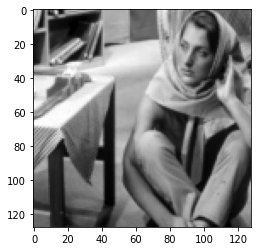

In [20]:
plt.imshow(rtm_img, cmap = 'gray')
plt.show()

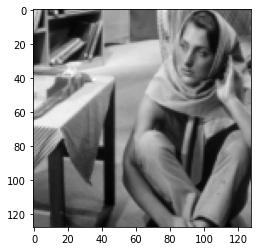

In [21]:
plt.imshow(image, cmap = 'gray')
plt.show()